<a href="https://colab.research.google.com/github/Moue224/Portafolio_inversion_Optimizacion_Multiobjetivo/blob/main/Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGAMOS LIBRERIA Y DATOS

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import line as line_chart
import numpy as np
from datetime import datetime, timedelta
from scipy.optimize import minimize
from scipy import optimize
import time

In [ ]:
# Instalación de Pyomo como paquete de modelado
!pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [ ]:
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121956 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

In [ ]:

!pip install -q amplpy
MODULES, LICENSE_UUID = ["coin"], " NLicumb"
from amplpy import AMPL, tools
ampl = tools.ampl_notebook(modules=MODULES, license_uuid=LICENSE_UUID, g=globals()) # instantiate AMPL object and register magics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.7 MB/s eta 0:00:00
Please provide a valid license UUID. You can use a free https://ampl.com/ce license.


In [ ]:
# Importación de los paquetes de Python
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
tickers =  ['AAPL', 'GOOGL', 'TSLA', 'AMZN', 'MSFT', 'AAL', 'EFX', 'FDX', 'JPM', 'KO']
acciones = ['APPLE','GOOGLE', 'TESLA','AMAZON', 'MICROSOFT', 'American Airlines Group', 'Equifax', 'FedEx', 'JP Morgan Chase', 'Coca-Cola']

In [ ]:
# Fecha de analisis
start_date = '2023-01-01'

end_date = '2024-02-29'

In [ ]:
adj_close_df = pd.DataFrame()

In [ ]:
for ticker in tickers:
  data = yf.download(ticker, start=start_date, end = end_date)
  adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(adj_close_df)

                  AAPL       GOOGL        TSLA        AMZN        MSFT    AAL  \
Date                                                                            
2023-01-03  124.216301   89.120003  108.099998   85.820000  237.036011  12.74   
2023-01-04  125.497498   88.080002  113.639999   85.139999  226.667282  13.59   
2023-01-05  124.166649   86.199997  110.339996   83.120003  219.949371  13.99   
2023-01-06  128.735245   87.339996  113.059998   86.080002  222.541550  14.18   
2023-01-09  129.261612   88.019997  119.769997   87.360001  224.708298  14.61   
...                ...         ...         ...         ...         ...    ...   
2024-02-22  184.369995  144.089996  197.410004  174.580002  411.649994  15.24   
2024-02-23  182.520004  143.960007  191.970001  174.990005  410.339996  15.13   
2024-02-26  181.160004  137.570007  199.399994  174.729996  407.540009  15.28   
2024-02-27  182.630005  138.880005  199.729996  173.539993  407.480011  15.54   
2024-02-28  181.419998  136.

In [ ]:
fig = line_chart(adj_close_df.iloc[:, :len(tickers)])
fig.update_layout(
    title="Time Series Chart of Adjusted Close Prices",
    xaxis_title="Date",
    yaxis_title="Adjusted Close Price",
)

fig.show()

In [ ]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

In [ ]:
log_returns

,AAPL,GOOGL,TSLA,AMZN,MSFT,AAL,EFX,FDX,JPM,KO
Date,,,,,,,,,,
2023-01-04,0.010261,-0.011738,0.049979,-0.007955,-0.044729,0.064588,0.031274,0.023306,0.009282,-0.000477
2023-01-05,-0.010661,-0.021575,-0.029469,-0.024012,-0.030086,0.029009,-0.032334,-0.000937,-0.000221,-0.011509
2023-01-06,0.036133,0.013138,0.024352,0.034992,0.011716,0.013490,0.032383,0.024467,0.018955,0.019109
2023-01-09,0.004080,0.007756,0.057655,0.014760,0.009689,0.029874,0.000098,0.021145,-0.004141,-0.012539
2023-01-10,0.004447,0.004534,-0.007711,0.028327,0.007588,0.038931,0.001758,-0.005284,0.008914,-0.007696
...,...,...,...,...,...,...,...,...,...,...
2024-02-22,0.011181,0.010745,0.013463,0.034913,0.023274,0.029972,0.032735,0.011327,0.011924,-0.001471
2024-02-23,-0.010085,-0.000903,-0.027944,0.002346,-0.003187,-0.007244,0.003012,-0.002871,0.005013,0.000817
2024-02-26,-0.007479,-0.045403,0.037974,-0.001487,-0.006847,0.009865,-0.002748,-0.009658,-0.003430,-0.008039


In [ ]:
cov_matrix = log_returns.cov()*252 # son los dias que se trabaja

In [ ]:
cov_matrix

,AAPL,GOOGL,TSLA,AMZN,MSFT,AAL,EFX,FDX,JPM,KO
AAPL,0.039532,0.032104,0.041280,0.027946,0.026127,0.022723,0.022594,0.019034,0.010473,0.004667
GOOGL,0.032104,0.091902,0.043870,0.058096,0.038357,0.020325,0.028802,0.024312,0.009642,0.003941
TSLA,0.041280,0.043870,0.269433,0.058303,0.038187,0.056899,0.048897,0.036759,0.029024,0.001548
AMZN,0.027946,0.058096,0.058303,0.104926,0.046474,0.030638,0.036494,0.024496,0.008236,0.003704
MSFT,0.026127,0.038357,0.038187,0.046474,0.058404,0.017720,0.022014,0.020172,0.004574,0.004570
AAL,0.022723,0.020325,0.056899,0.030638,0.017720,0.142648,0.046529,0.040305,0.025200,0.000200
EFX,0.022594,0.028802,0.048897,0.036494,0.022014,0.046529,0.080644,0.025704,0.015347,0.004678
FDX,0.019034,0.024312,0.036759,0.024496,0.020172,0.040305,0.025704,0.069929,0.011848,0.006323
JPM,0.010473,0.009642,0.029024,0.008236,0.004574,0.025200,0.015347,0.011848,0.039271,0.005245
KO,0.004667,0.003941,0.001548,0.003704,0.004570,0.000200,0.004678,0.006323,0.005245,0.017799


In [ ]:
# Retornos esperados
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

# Desviacion standar del portafolio
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

# PLANTEAMOS FUNCIONES

In [ ]:
from pyomo.environ import *

def cargarModelo_nl(tickers, log_returns, cov_matrix):
    model = ConcreteModel()

    model.X = Var(tickers, within=NonNegativeReals) #NonNegativeReals o entero (NonNegativeIntegers)

    model.C1 = ConstraintList()
    for ticker in tickers:
      model.C1.add(model.X[ticker] >= 0)
      model.C1.add(model.X[ticker] <= 0.2)
    model.C2 = Constraint(expr = sum(model.X[ticker] for ticker in tickers) == 1)

    model.f1 = Var()
    model.f2 = Var()

    model.C_f1 = Constraint(expr = model.f1 == sum(sum(model.X[i] * model.X[j] * cov_matrix.loc[i, j] for j in tickers) for i in tickers))
    model.C_f2 = Constraint(expr = model.f2 == sum(model.X[ticker] * log_returns[ticker].mean() for ticker in tickers))

    model.O_f1 = Objective(expr = model.f1, sense=minimize)
    model.O_f2 = Objective(expr = model.f2, sense=maximize)

    return model


In [ ]:
def encontrarExtremos(model, tickers):
    extremos = []

    model.O_f1.deactivate()
    model.O_f2.activate()
    solver = SolverFactory('ipopt') #ipopt
    solver.solve(model)
    f2_min = value(model.f2)
    f1_max = value(model.f1)

    model.O_f1.activate()
    model.O_f2.deactivate()
    solver.solve(model)
    f2_max = value(model.f2)
    f1_min = value(model.f1)

    model.O_f1.activate()

    return f2_min, f2_max, f1_min, f1_max, solver


In [ ]:
model = cargarModelo_nl(tickers, log_returns, cov_matrix)
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremos(model, tickers)

# Imprime los resultados
print("Valor mínimo de f2:", f2_min)
print("Valor máximo de f2:", f2_max)
print("Valor mínimo de f1:", f1_min)
print("Valor máximo de f1:", f1_max)
print("Solver utilizado:", solver)

Valor mínimo de f2: 0.001850476805411109
Valor máximo de f2: 0.0010858228901384135
Valor mínimo de f1: 0.017471957415620618
Valor máximo de f1: 0.055422871807810165
Solver utilizado: <pyomo.solvers.plugins.solvers.IPOPT.IPOPT object at 0x7c8d2c193b20>


In [ ]:
# Vector Ideal
vector_ideal = [f1_min, f2_min]
print(f'Vector ideal: {vector_ideal[0]}, {vector_ideal[1]}')

# Vector antideal
vector_antideal = [f1_max, f2_max]
print(f'Vector nadir: {vector_antideal[0]}, {vector_antideal[1]}')

Vector ideal: 0.017471957415620618, 0.001850476805411109
Vector nadir: 0.055422871807810165, 0.0010858228901384135


In [ ]:
def encontrarExtremosLexicographic(model, tickers, log_returns, cov_matrix):
    solver = SolverFactory('ipopt') # bonmin - ipopt - cplex - glpk
    # Maximizo f1 libremente
    model.O_f2.deactivate()
    model.O_f1.activate()

    solver.solve(model)

    print('Extremo 1')
    print('Primer paso')
    print('Pesos:', [model.X[ticker].value for ticker in tickers])
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )
    f1_min = value(model.f1)

    # Maximizo f2 sujeto a que f1 no empeore
    model.O_f2.activate()
    model.O_f1.deactivate()
    model.C_epsilon = Constraint(expr=model.f1 <= f1_min)

    solver.solve(model)

    print('Segundo paso')
    print('Pesos:', [model.X[ticker].value for ticker in tickers])
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )

    # Tomo el mínimo de f2
    f2_min = value(model.f2)
    # Elimino restricción que impide empeorar a f1 para volver
    model.del_component(model.C_epsilon)

    # Maximizo f2 libremente
    model.O_f1.deactivate()
    model.O_f2.activate()

    solver.solve(model)

    print('Extremo 2')
    print('Primer paso')
    print('Pesos:', [model.X[ticker].value for ticker in tickers])
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )
    f2_max = value(model.f2)

    # Maximizo f1 sujeto a que f2 no empeore
    model.O_f1.activate()
    model.O_f2.deactivate()
    model.C_epsilon = Constraint(expr = model.f2 >= f2_max)

    solver.solve(model)

    print('Segundo paso')
    print('Pesos:', [model.X[ticker].value for ticker in tickers])
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )

    # Tomo el mínimo de f1 sobre el frente de Pareto
    f1_max = value(model.f1)

    model.del_component(model.C_epsilon)

    model.O_f1.activate()

    return f2_min, f2_max, f1_min, f1_max, solver


In [ ]:
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model, tickers, log_returns, cov_matrix)

print(f'f2_min: {f2_min}, f2_max: {f2_max}, f1_min: {f1_min}, f1_max: {f1_max}')


Extremo 1
Primer paso
Pesos: [0.1999994267441173, 0.009789848375390932, 3.0271318558054643e-07, 4.117329728924721e-06, 0.1825044049677891, 0.004969465798414309, 0.07534839605545456, 0.1273842654814562, 0.19999984701295548, 0.19999992552150758]
f1 = 0.01747195585925666
f2 = 0.0010858192961441828
Segundo paso
Pesos: [0.19999995872228793, 0.009702064144054058, 1.7544633037491175e-08, 3.5195387915000526e-07, 0.18306780040312634, 0.00475257917805098, 0.07518943920448974, 0.1272877905792444, 0.1999999957078839, 0.20000000256235057]
f1 = 0.017471965639585755
f2 = 0.0010863100090344657
Extremo 2
Primer paso
Pesos: [0.199886024678026, 0.19998633221137, 0.19999714631532337, 0.19999781176150677, 0.19999574626312572, 8.081420585239893e-06, 2.2294366295910667e-05, 4.728419504779529e-05, 5.550517009337457e-05, 3.773618625805653e-06]
f1 = 0.0554228726738309
f2 = 0.0018504768053636098
Segundo paso
Pesos: [0.19957694929770722, 0.19999989288919237, 0.19999999772962954, 0.2000000031415734, 0.199999997136

In [ ]:
# Vector Ideal
vector_ideal = [f1_min, f2_max]
print(f'Vector ideal: {vector_ideal[0]}, {vector_ideal[1]}')

# Vector antideal
vector_antideal = [f1_max, f2_min]
print(f'Vector nadir: {vector_antideal[0]}, {vector_antideal[1]}')

Vector ideal: 0.01747195585925666, 0.0018504768053636098
Vector nadir: 0.055409633949073396, 0.0010863100090344657


# METODO DE SUMAS PONDERADAS

In [ ]:
def Normalized_Weighting_Sum(model, f1_min, f1_max, f2_min, f2_max, solver, n):

    model.O_f1.deactivate()
    model.O_f2.deactivate()

    # Peso de los vectores
    model.w1 = Param(initialize=0, mutable=True, within=NonNegativeReals)
    model.w2 = Param(initialize=0, mutable=True, within=NonNegativeReals)

    model.O_f = Objective(expr= ((model.f1 - f1_min) / (f1_max - f1_min)) * model.w1 + ((f2_max - model.f2) / (f2_max - f2_min)) * model.w2, sense=minimize)

    step = 1 / n

    x1_l = []
    x2_l = []
    f1_l = []
    f2_l = []

    inicio = time.time()

    for i in range(n):

        model.w1.set_value(i * step)
        cte = i * step
        model.w2.set_value(1 - cte)

        solver.solve(model)

        f1_l.append(value(model.O_f1))
        f2_l.append(value(model.O_f2))

        print("Sol vars - it:" + str(i) + " w1= " + str(cte) + " w2= " + str(1 - cte))
        print("Sol FO - it:" + str(i) + " f1= " + str(f1_l[len(f1_l) - 1]) + " f2= " + str(f2_l[len(f2_l) - 1]))


    fin = time.time()

    tiempo_transcurrido = fin - inicio
    df_Normalized_Weighting_Sum = pd.DataFrame({'f1': f1_l, 'f2': f2_l})

    print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    print(df_Normalized_Weighting_Sum)

    plt.plot(f1_l, f2_l, 'o-.')
    plt.plot(0, 0, 'x-.')
    plt.title('Normalized Weighted Sum Pareto-front FO')
    plt.xlabel("f1", fontsize=10)
    plt.ylabel("f2", fontsize=10)
    plt.grid(True)
    plt.savefig("Normalized Weighted Sum - FO", dpi=600, bbox_inches="tight")
    plt.show()


    model.del_component(model.O_f)
    model.del_component(model.w1)
    model.del_component(model.w2)
    model.O_f1.activate()
    model.O_f2.activate()

Extremo 1
Primer paso
Pesos: [0.1999997984499466, 0.00978695736288783, 1.0346627743477561e-07, 1.4078866809769564e-06, 0.18250955173900524, 0.004959660010071195, 0.07535367742858991, 0.1273889134242298, 0.1999999508795619, 0.1999999793527491]
f1 = 0.01747194901812631
f2 = 0.00108582284856953
Segundo paso
Pesos: [0.19999996730653657, 0.009716069859660285, 1.2926704155628358e-08, 2.8849820093828625e-07, 0.18297478339400594, 0.004786908445971834, 0.0752171052377912, 0.12730486242680308, 0.19999999809547547, 0.20000000380885044]
f1 = 0.01747195883514296
f2 = 0.0010862285324021216
Extremo 2
Primer paso
Pesos: [0.19988602450697804, 0.19998633233278504, 0.19999714632039084, 0.19999781176451192, 0.19999574627426236, 8.081440067439496e-06, 2.2294473069003787e-05, 4.728423311547524e-05, 5.550503170967402e-05, 3.773623110152672e-06]
f1 = 0.05542287268236412
f2 = 0.0018504768053630189
Segundo paso
Pesos: [0.1995769492924436, 0.19999989288919232, 0.19999999772962954, 0.2000000031415734, 0.199999997

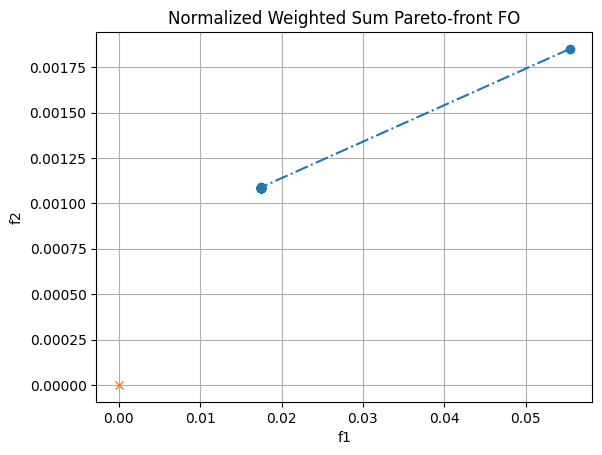

In [ ]:
model = cargarModelo_nl(tickers, log_returns, cov_matrix)
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model, tickers, log_returns, cov_matrix)
n = 20
Normalized_Weighting_Sum(model, f2_min, f2_max, f1_min, f1_max, solver, n)

# METODO DE EPSILON RESTRICCIONES

In [ ]:
def Normal_Epsilon(model, f2_min, f2_max, solver, n):

    model.O_f1.activate()
    model.O_f2.deactivate()

    model.e = Param(initialize=0, mutable=True)
    model.C_epsilon = Constraint(expr = model.f2 >= model.e)

    step = (f2_max - f2_min) / n

    f1_l = []
    f2_l = []

    inicio = time.time()

    i = 0
    while i < n + 1:

        model.e = f2_min + i * step
        e_ = f2_min + i * step

        solver.solve(model)

        f1_l.append(value(model.f1))
        f2_l.append(value(model.f2))

        print("Epsilon " + str(e_))
        print("Sol FO - it:" + str(i) + " f1= " + str(f1_l[len(f1_l)-1]) + " f2= " + str(f2_l[len(f2_l)-1]))

        i = i + 1

    fin = time.time()

    tiempo_transcurrido = fin - inicio
    df_Normal_Epsilon = pd.DataFrame({'f1': f1_l, 'f2': f2_l})



    print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    print(df_Normal_Epsilon)

    # Graficar el vector Ideal
    #plt.plot(vector_ideal[0], vector_ideal[1], 'ro', label='Vector Ideal')
    # Graficar el vector antideal
    #plt.plot(vector_antideal[0], vector_antideal[1], 'bo', label='Vector Antideal (Nadir)')

    # Frontera de Pareto
    plt.plot(f1_l,f2_l,'o-.')
    plt.title('Normal epsilon-Constraint Pareto-front FO')
    plt.xlabel("f1", fontsize = 10)
    plt.ylabel("f2", fontsize = 10)
    plt.grid(True)
    plt.show()
    plt.close()

    model.del_component(model.C_epsilon)
    model.del_component(model.e)


Extremo 1
Primer paso
Pesos: [0.19999942674407023, 0.009789854037004364, 3.0271319014161276e-07, 4.1184892743214874e-06, 0.18250439625833564, 0.004969493405354733, 0.075348382618323, 0.12738425319999402, 0.19999984701294587, 0.19999992552150772]
f1 = 0.017471955839957354
f2 = 0.0010858192806097496
Segundo paso
Pesos: [0.19999995874454754, 0.00970210049243678, 1.7532655730393028e-08, 3.517883073253484e-07, 0.18306755900184624, 0.004752668269454398, 0.07518951100554938, 0.12728783488554618, 0.1999999957140731, 0.2000000025655834]
f1 = 0.017471965620381547
f2 = 0.001086309797582665
Extremo 2
Primer paso
Pesos: [0.19988602467757632, 0.19998633221168904, 0.1999971463153367, 0.19999781176151468, 0.19999574626315497, 8.081420636429575e-06, 2.2294366576393142e-05, 4.7284195147083283e-05, 5.55051697308468e-05, 3.773618637588759e-06]
f1 = 0.05542287267385328
f2 = 0.0018504768053636085
Segundo paso
Pesos: [0.19957694929769665, 0.19999989288919237, 0.19999999772962954, 0.2000000031415734, 0.199999

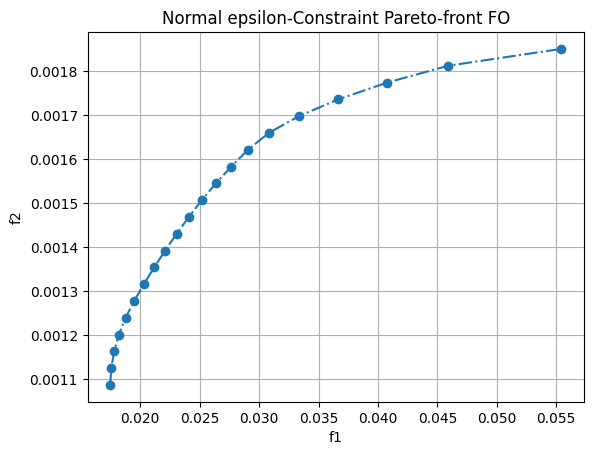

In [ ]:
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model, tickers, log_returns, cov_matrix)
n = 20
Normal_Epsilon(model, f2_min, f2_max, solver, n)

# METODO DE EPSILON RESTRICCIONES AUMENTADO

In [ ]:
def Aumented_Epsilon(model, f2_min, f2_max, solver, n):

    model.O_f1.deactivate()
    model.O_f2.deactivate()

    model.s = Var(within=NonNegativeReals)
    model.e = Param(initialize=0, mutable=True)
    model.C_e = Constraint(expr =  model.O_f2 - model.s == model.e)

    model.delta = Param(initialize=0.00001)


    model.O_f = Objective(expr = model.f1 + model.delta * model.s / (f2_max - f2_min), sense=minimize)


    x_l = []
    f1_l = []
    f2_l = []

    inicio = time.time() # registramos el tiempo

    step = (f2_max - f2_min)/n

    i = 0
    redundant_it = 0
    while i < n + 1:
        e_ = f2_min + i * step
        model.e = f2_min + i * step
        solver.solve(model)
        f1_l.append(value(model.O_f1))
        f2_l.append(value(model.O_f2))
        print(f"Epsilon {e_}")
        print(f"Sol FO - it:{i} f1= {f1_l[-1]} f2= {f2_l[-1]}")

        b = floor(value(model.s)/step)

        if b > 0:
            redundant_it += 1
        i = i + 1

    fin = time.time()

    tiempo_transcurrido = fin - inicio

    df_Aumented_Epsilon = pd.DataFrame({'f1': f1_l, 'f2': f2_l})


    print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    print(df_Aumented_Epsilon)


    # Graficar el vector Ideal
    #plt.plot(vector_ideal[0], vector_ideal[1], 'ro', label='Vector Ideal')
    # Graficar el vector antideal
    #plt.plot(vector_antideal[0], vector_antideal[1], 'bo', label='Vector Antideal (Nadir)')

    plt.plot(f1_l,f2_l,'o-.')
    plt.title('Augmented epsilon-Constraint Pareto-front FO')
    plt.xlabel("f1", fontsize = 10)
    plt.ylabel("f2", fontsize = 10)
    plt.grid(True)
    plt.show()


    model.del_component(model.O_f)
    model.del_component(model.delta)
    model.del_component(model.e)
    model.del_component(model.s)
    model.del_component(model.C_e)

Extremo 1
Primer paso
Pesos: [0.19999942674558416, 0.009789637671761204, 3.027671432123612e-07, 9.347257280093406e-06, 0.1825007965790027, 0.004970577396686894, 0.0753466451471725, 0.12738349390304016, 0.19999984701077364, 0.1999999255215554]
f1 = 0.01747195740533879
f2 = 0.0010858228857765484
Segundo paso
Pesos: [0.19999995696807585, 0.00969919989125063, 1.8488580481984643e-08, 3.650217153050465e-07, 0.18308682280237282, 0.004745558803518422, 0.07518378126533067, 0.12728429923141305, 0.19999999522017142, 0.20000000230757148]
f1 = 0.017471967178174126
f2 = 0.0010863266714347824
Extremo 2
Primer paso
Pesos: [0.19988602471357955, 0.19998633218615003, 0.19999714631427082, 0.1999978117608826, 0.1999957462608126, 8.08141653878806e-06, 2.229434412534703e-05, 4.7284187210842874e-05, 5.550519873520816e-05, 3.7736176943653594e-06]
f1 = 0.05542287267206391
f2 = 0.0018504768053637336
Segundo paso
Pesos: [0.19957694929881303, 0.19999989288919237, 0.19999999772962954, 0.2000000031415734, 0.19999999

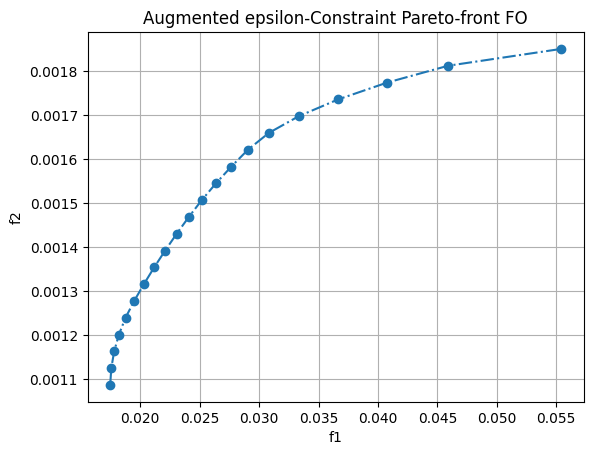

In [ ]:
f2_min, f2_max, f1_min, f1_max, solver =  encontrarExtremosLexicographic(model, tickers, log_returns, cov_matrix)
n = 20
Aumented_Epsilon(model, f2_min, f2_max, solver, n)

# CARTERA EFICIENTE

In [ ]:
def Investment_Normal_Epsilon(model, f2_min, f2_max, solver, n):

    model.O_f1.activate()
    model.O_f2.deactivate()

    model.e = Param(initialize=0, mutable=True)
    model.C_epsilon = Constraint(expr = model.f2 >= model.e)

    step = (f2_max - f2_min) / n

    x_optimo = []
    f1_l = []
    f2_l = []
    e_values = []

    inicio = time.time()

    i = 0
    while i < n + 1:

        model.e = f2_min + i * step
        e_ = f2_min + i * step

        solver.solve(model)

        f1_l.append(value(model.f1))
        f2_l.append(value(model.f2))
        e_values.append(e_)

        print("Epsilon " + str(e_))
        print("Sol FO - it:" + str(i) + " f1= " + str(f1_l[len(f1_l)-1]) + " f2= " + str(f2_l[len(f2_l)-1]))
        print("Valor de epsilon (e):", e_)


        x_optimo.append([value(model.X[ticker]) * 100 for ticker in tickers])

        i = i + 1

    fin = time.time()

    tiempo_transcurrido = fin - inicio
    df_Normal_Epsilon = pd.DataFrame({'f1': f1_l, 'f2': f2_l, 'x_optimo': [list(map(lambda x: round(x, 2), sublist)) for sublist in x_optimo]})


    # Guardar el DataFrame en un archivo CSV
    csv_filename = "resultados_epsilon_normal.csv"
    df_Normal_Epsilon.to_csv(csv_filename, index=False)

    print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    print(df_Normal_Epsilon)
    print(x_optimo)

    # Graficar el vector Ideal
    #plt.plot(vector_ideal[0], vector_ideal[1], 'ro', label='Vector Ideal')
    # Graficar el vector antideal
    #plt.plot(vector_antideal[0], vector_antideal[1], 'bo', label='Vector Antideal (Nadir)')

    # Frontera de Pareto
    plt.plot(f1_l,f2_l,'o-.')
    plt.title('Método de las epsilon-restricciones', fontsize = 15)
    plt.xlabel("f1 (Variabilidad)", fontsize = 15)
    plt.ylabel("f2 (Retorno esperado)", fontsize = 15)
    plt.grid(True)
    plt.gcf().set_size_inches(8, 6)
    plt.savefig("Método de las epsilon-restricciones")
    plt.show()
    plt.close()

    plt.plot(range(len(e_values)), e_values, 'o-.', label='Valor de e_')
    plt.title('Variación de e_ en cada iteración')
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor de e_')

    model.del_component(model.C_epsilon)
    model.del_component(model.e)


Epsilon 0.0010863266714254418
Sol FO - it:0 f1= 0.017471987585257805 f2= 0.0010864083441713042
Valor de epsilon (e): 0.0010863266714254418
Epsilon 0.0011245341781223564
Sol FO - it:1 f1= 0.017563839417327566 f2= 0.0011245243910593201
Valor de epsilon (e): 0.0011245341781223564
Epsilon 0.001162741684819271
Sol FO - it:2 f1= 0.017805499784042358 f2= 0.0011627317932106102
Valor de epsilon (e): 0.001162741684819271
Epsilon 0.0012009491915161855
Sol FO - it:3 f1= 0.018204928270352166 f2= 0.0012009393916743826
Valor de epsilon (e): 0.0012009491915161855
Epsilon 0.0012391566982131001
Sol FO - it:4 f1= 0.01876218382911326 f2= 0.0012391468487282324
Valor de epsilon (e): 0.0012391566982131001
Epsilon 0.0012773642049100148
Sol FO - it:5 f1= 0.019490234867753385 f2= 0.001277354248816779
Valor de epsilon (e): 0.0012773642049100148
Epsilon 0.0013155717116069294
Sol FO - it:6 f1= 0.020307146185122707 f2= 0.00131556182524343
Valor de epsilon (e): 0.0013155717116069294
Epsilon 0.001353779218303844
Sol 

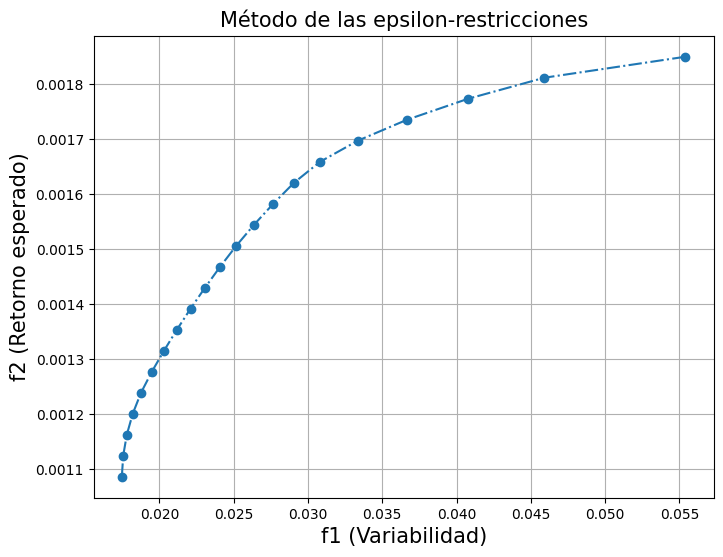

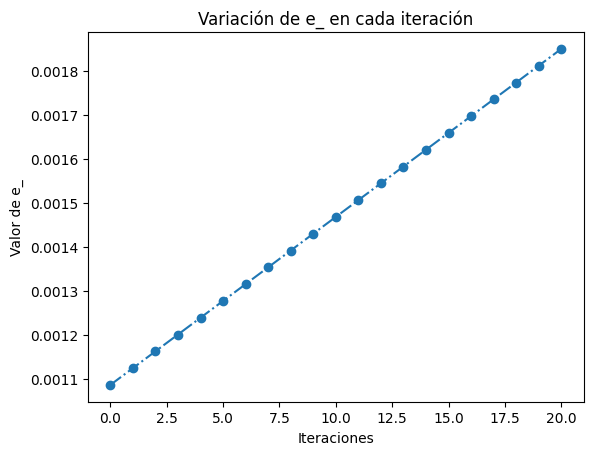

In [ ]:
n = 20
Investment_Normal_Epsilon(model, f2_min, f2_max, solver, n)

In [ ]:
def Investment_Aumented_Epsilon(model, f2_min, f2_max, solver, n):

    model.O_f1.deactivate()
    model.O_f2.deactivate()

    model.s = Var(within=NonNegativeReals)
    model.e = Param(initialize=0, mutable=True)
    model.C_e = Constraint(expr =  model.O_f2 - model.s == model.e)

    model.delta = Param(initialize=0.00001)


    model.O_f = Objective(expr = model.f1 + model.delta * model.s / (f2_max - f2_min), sense=minimize)


    x_optimo = []
    f1_l = []
    f2_l = []
    e_values = []

    inicio = time.time() # registramos el tiempo

    step = (f2_max - f2_min)/n

    i = 0
    redundant_it = 0
    while i < n + 1:
        e_ = f2_min + i * step
        model.e = f2_min + i * step
        solver.solve(model)
        f1_l.append(value(model.O_f1))
        f2_l.append(value(model.O_f2))
        e_values.append(e_)

        print(f"Epsilon {e_}")
        print(f"Sol FO - it:{i} f1= {f1_l[-1]} f2= {f2_l[-1]}")
        print("Valor de epsilon (e):", e_)

        x_optimo.append([value(model.X[ticker]) * 100 for ticker in tickers])

        b = floor(value(model.s)/step)

        if b > 0:
            redundant_it += 1
        i = i + 1

    fin = time.time()

    tiempo_transcurrido = fin - inicio

    df_Aumented_Epsilon = pd.DataFrame({'f1': f1_l, 'f2': f2_l, 'x_optimo': [list(map(lambda x: round(x, 2), sublist)) for sublist in x_optimo]})

    # Guardar el DataFrame en un archivo CSV
    csv_filename = "resultados_aumented_epsilon.csv"
    df_Aumented_Epsilon.to_csv(csv_filename, index=False)

    print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    print(df_Aumented_Epsilon)
    print(x_optimo)


    # Graficar el vector Ideal
    #plt.plot(vector_ideal[0], vector_ideal[1], 'ro', label='Vector Ideal')
    # Graficar el vector antideal
    #plt.plot(vector_antideal[0], vector_antideal[1], 'bo', label='Vector Antideal (Nadir)')

    plt.plot(f1_l,f2_l,'o-.')
    plt.title('Método de las epsilon-restricciones aumentado', fontsize = 15)
    plt.xlabel("f1 (Variabilidad)", fontsize = 15)
    plt.ylabel("f2 (Retorno esperado)", fontsize = 15)
    plt.grid(True)
    plt.gcf().set_size_inches(8, 6)
    plt.savefig("Método de las epsilon-restricciones Aumentado")
    plt.show()

    plt.plot(range(len(e_values)), e_values, 'o-.', label='Valor de e_')
    plt.title('Variación de e_ en cada iteración')
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor de e_')

    model.del_component(model.O_f)
    model.del_component(model.delta)
    model.del_component(model.e)
    model.del_component(model.s)
    model.del_component(model.C_e)

Epsilon 0.0010863266714347824
Sol FO - it:0 f1= 0.01747198643168646 f2= 0.0010863935925736312
Valor de epsilon (e): 0.0010863266714347824
Epsilon 0.00112453417813123
Sol FO - it:1 f1= 0.017563839412670475 f2= 0.001124524390417261
Valor de epsilon (e): 0.00112453417813123
Epsilon 0.0011627416848276775
Sol FO - it:2 f1= 0.01780549978264028 f2= 0.001162731793050152
Valor de epsilon (e): 0.0011627416848276775
Epsilon 0.001200949191524125
Sol FO - it:3 f1= 0.018204928267864056 f2= 0.0012009393914733204
Valor de epsilon (e): 0.001200949191524125
Epsilon 0.0012391566982205727
Sol FO - it:4 f1= 0.018762183831437705 f2= 0.0012391468486174317
Valor de epsilon (e): 0.0012391566982205727
Epsilon 0.0012773642049170202
Sol FO - it:5 f1= 0.0194902348677392 f2= 0.0012773542487960526
Valor de epsilon (e): 0.0012773642049170202
Epsilon 0.0013155717116134678
Sol FO - it:6 f1= 0.02030714618383698 f2= 0.0013155618251825723
Valor de epsilon (e): 0.0013155717116134678
Epsilon 0.0013537792183099153
Sol FO - i

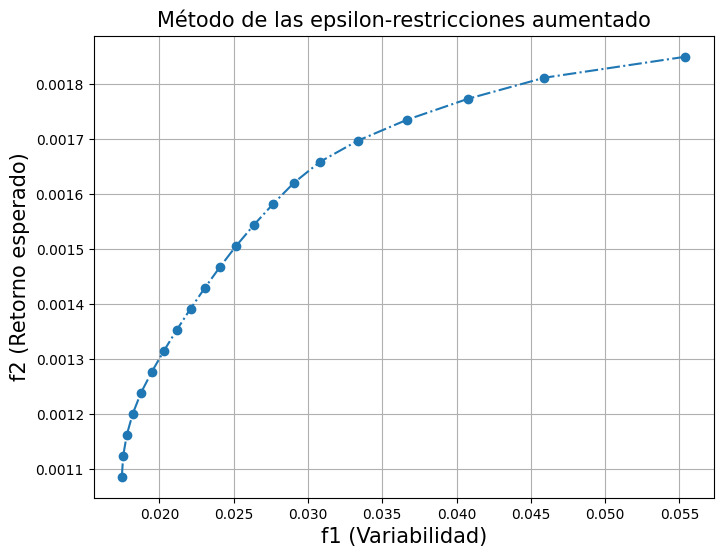

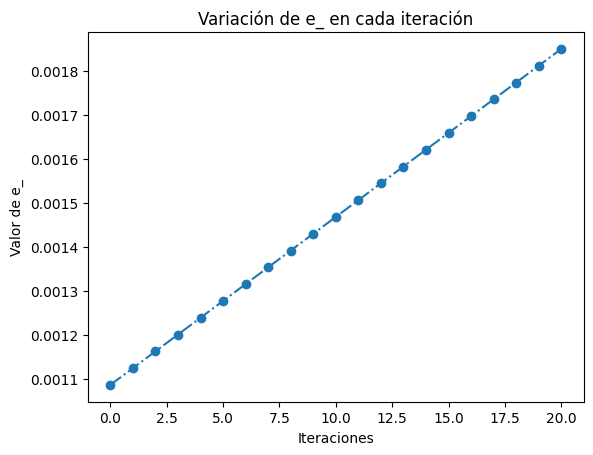

In [ ]:
n = 20
Investment_Aumented_Epsilon(model, f2_min, f2_max, solver, n)

# METRICAS

In [ ]:
def spacing(data):
    n = len(data)

    if n <= 1:
        return 0.0


    distances = np.linalg.norm(data - np.mean(data, axis=0), axis=1)
    mean_distance = np.mean(distances)


    spread_sum = np.sum(np.abs(distances - mean_distance))

    return spread_sum


df = pd.read_csv('resultados_aumented_epsilon.csv')


solutions = df[['f1', 'f2']].values

# Calcula el Spacing
spread_value = spacing(solutions)
print("Spacing:", spread_value)

Spacing: 0.09168759443784441


In [ ]:
def spread(data, f1_min, f1_max, f2_min, f2_max):
    n = len(data)

    if n <= 1:
        return 0.0


    min_distances = np.array([f1_min, f2_min])
    max_distances = np.array([f1_max, f2_max])


    distances = np.zeros((n,))
    for i, point in enumerate(data):
        distance = np.linalg.norm(point - min_distances)
        distance = min(distance, np.linalg.norm(point - max_distances))
        distances[i] = distance


    mean_distance = np.mean(distances)


    numerator = np.sum(min_distances) + np.sum(mean_distance - distances)
    denominator = np.sum(min_distances) + n * mean_distance
    spread_value = numerator / denominator

    return spread_value


df = pd.read_csv('resultados_aumented_epsilon.csv')


solutions = df[['f1', 'f2']].values


# Calcular el Spread
spread_value = spread(solutions, f1_min, f1_max, f2_min, f2_max)
print("Spread:", spread_value)


Spread: 0.1181802674427623


In [ ]:
# Modifico para encontrar la cantidad de puntos

def Normal_Epsilon(model, f2_min, f2_max, solver, n):

    model.O_f1.activate()
    model.O_f2.deactivate()

    model.e = Param(initialize=0, mutable=True)
    model.C_epsilon = Constraint(expr = model.f2 >= model.e)

    step = (f2_max - f2_min) / n

    unique_points = set()  # Conjunto para almacenar puntos únicos

    inicio = time.time()

    i = 0
    while i < n + 1:

        model.e = f2_min + i * step
        e_ = f2_min + i * step

        solver.solve(model)

        f1 = value(model.f1)
        f2 = value(model.f2)

        unique_points.add((f1, f2))  # Agregar el punto al conjunto


        i = i + 1

    fin = time.time()

    tiempo_transcurrido = fin - inicio
    df_Normal_Epsilon = pd.DataFrame({'f1': [point[0] for point in unique_points],
                                      'f2': [point[1] for point in unique_points]})

    print("Número de puntos distintos encontrados:", len(unique_points))
    print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    print(df_Normal_Epsilon)

    model.del_component(model.C_epsilon)
    model.del_component(model.e)


In [ ]:
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model, tickers, log_returns, cov_matrix)
n = 10
Normal_Epsilon(model, f2_min, f2_max, solver, n)

Extremo 1
Primer paso
Pesos: [0.19999942674558416, 0.00978963767177815, 3.027671432124641e-07, 9.347257285017663e-06, 0.18250079657898613, 0.0049705773967005365, 0.0753466451471621, 0.12738349390303155, 0.19999984701077364, 0.1999999255215554]
f1 = 0.017471957405338766
f2 = 0.0010858228857765421
Segundo paso
Pesos: [0.19999995696807588, 0.009699199891288523, 1.8488580457674992e-08, 3.650217145492447e-07, 0.18308682280212368, 0.004745558803610377, 0.07518378126540493, 0.12728429923145868, 0.19999999522017142, 0.20000000230757148]
f1 = 0.017471967178174102
f2 = 0.0010863266714345636
Extremo 2
Primer paso
Pesos: [0.19988602471357955, 0.19998633218615003, 0.19999714631427082, 0.1999978117608826, 0.1999957462608126, 8.081416538788116e-06, 2.2294344125347345e-05, 4.728418721084316e-05, 5.550519873520805e-05, 3.773617694365372e-06]
f1 = 0.05542287267206391
f2 = 0.0018504768053637336
Segundo paso
Pesos: [0.19957694929881303, 0.19999989288919237, 0.19999999772962954, 0.2000000031415734, 0.19999

In [ ]:
# Modifico para encontrar la cantidad de puntos

def Aumented_Epsilon(model, f2_min, f2_max, solver, n):

    model.O_f1.deactivate()
    model.O_f2.deactivate()

    model.s = Var(within=NonNegativeReals)
    model.e = Param(initialize=0, mutable=True)
    model.C_e = Constraint(expr =  model.O_f2 - model.s == model.e)

    model.delta = Param(initialize=0.00001)

    unique_points = set()  # Conjunto para almacenar puntos únicos

    inicio = time.time()

    step = (f2_max - f2_min)/n

    i = 0
    redundant_it = 0
    while i < n + 1:
        e_ = f2_min + i * step
        model.e = f2_min + i * step
        solver.solve(model)
        f1 = value(model.O_f1)
        f2 = value(model.O_f2)
        unique_points.add((f1, f2))  # Agregar el punto al conjunto

        b = floor(value(model.s)/step)

        if b > 0:
            redundant_it += 1
        i = i + 1

    fin = time.time()

    tiempo_transcurrido = fin - inicio

    df_Aumented_Epsilon = pd.DataFrame({'f1': [point[0] for point in unique_points],
                                        'f2': [point[1] for point in unique_points]})

    print("Número de puntos distintos encontrados:", len(unique_points))
    print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    print(df_Aumented_Epsilon)



    model.del_component(model.delta)
    model.del_component(model.e)
    model.del_component(model.s)
    model.del_component(model.C_e)


In [ ]:
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model, tickers, log_returns, cov_matrix)
n = 10
Aumented_Epsilon(model, f2_min, f2_max, solver, n)

Extremo 1
Primer paso
Pesos: [0.19999942674558416, 0.009789637673738093, 3.027671432143377e-07, 9.347255541844945e-06, 0.18250079657931478, 0.004970577395045755, 0.07534664514787687, 0.12738349390342626, 0.19999984701077364, 0.1999999255215554]
f1 = 0.01747195740533791
f2 = 0.0010858228857759296
Segundo paso
Pesos: [0.19999995696807682, 0.009699199892856503, 1.848857995228084e-08, 3.650217079497283e-07, 0.18308682279170913, 0.004745558807453962, 0.07518378126850235, 0.1272842992333702, 0.1999999952201717, 0.20000000230757162]
f1 = 0.01747196717817325
f2 = 0.0010863266714254418
Extremo 2
Primer paso
Pesos: [0.1998860247135794, 0.19998633218615003, 0.19999714631427082, 0.1999978117608826, 0.19999574626081262, 8.081416538790244e-06, 2.2294344125358438e-05, 4.728418721083859e-05, 5.550519873517821e-05, 3.7736176943658646e-06]
f1 = 0.0554228726720639
f2 = 0.0018504768053637336
Segundo paso
Pesos: [0.19957694929881475, 0.19999989288919237, 0.19999999772962954, 0.2000000031415734, 0.199999997